You should implement at least the modules Linear (fully connected layer), ReLU , Tanh , Sequential
to combine several modules in basic sequential structure, and LossMSE to compute the MSE loss.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from sequential import Sequential
from linear import Linear
from activations import ReLU, Tanh
from losses import MSE
from utils import build_data

In [4]:
import warnings
warnings.filterwarnings("ignore", message="other is not broadcastable to self, but they have the same number of elements.  Falling back to deprecated pointwise behavior.")

In [5]:
x_train, y_train = build_data(10000)
x_validation, y_validation = build_data(10000)

In [9]:
def build_model():
    model = Sequential(MSE(), input_size=2)
    model.add_layer(Linear(2, 25))
    model.add_layer(ReLU(25))
    model.add_layer(Linear(25, 25))
    model.add_layer(ReLU(25))
    model.add_layer(Linear(25, 25))
    model.add_layer(ReLU(25))
    model.add_layer(Linear(25, 2))
    return model

In [10]:
model = build_model()
model.summary()
model.fit(x_train, y_train, x_validation, y_validation, epochs=40, step_size=0.001)

Model with 7 layers
	Input size : 2
	Fully connected layer of 25 hidden units
	ReLU activation layer of size 25
	Fully connected layer of 25 hidden units
	ReLU activation layer of size 25
	Fully connected layer of 25 hidden units
	ReLU activation layer of size 25
	2 fully connected output units
Loss at epoch 1 : 0.26487979677682744
Loss at epoch 2 : 0.1836067167585301
Loss at epoch 3 : 0.15154163761603218
Loss at epoch 4 : 0.19364515777314373
Loss at epoch 5 : 0.13826301709203673
Loss at epoch 6 : 0.09661138496940538
Loss at epoch 7 : 0.11761102480687383
Loss at epoch 8 : 0.07406810958491906
Loss at epoch 9 : 0.05714476402663257
Loss at epoch 10 : 0.053145935256784606
Loss at epoch 11 : 0.04999281336403023
Loss at epoch 12 : 0.0495630530155477
Loss at epoch 13 : 0.046996683244415645
Loss at epoch 14 : 0.04779840294091659
Loss at epoch 15 : 0.047292940637629295
Loss at epoch 16 : 0.04656880783059761
Loss at epoch 17 : 0.048169370280602836
Loss at epoch 18 : 0.04466576658442969
Loss at e

(0.9779, 0.9745)

In [11]:
preds = model.predict(x_validation)

In [12]:
def get_coords(x, indexes):
    xs = []
    ys = []
    for i in indexes:
        xs.append(x[i][0])
        ys.append(x[i][1])
    return xs, ys

In [13]:
x1, y1 = get_coords(x_validation, np.where(preds != y_validation)[0])
x2, y2 = get_coords(x_validation, np.where(preds == y_validation)[0])

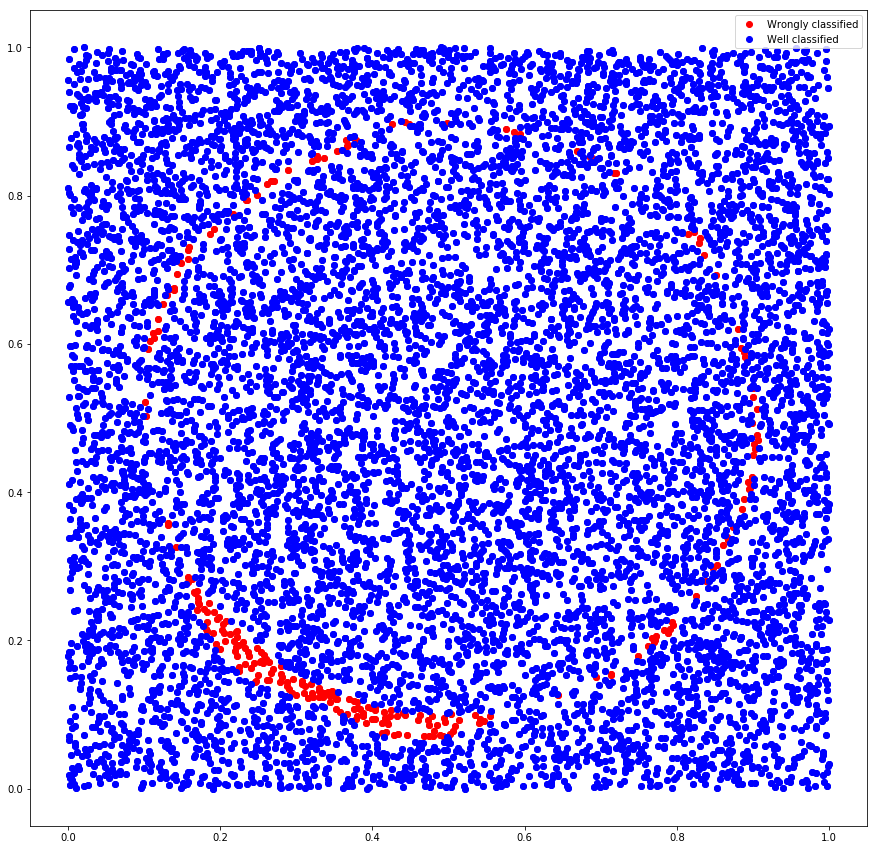

In [14]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.plot(x1, y1, 'ro', color='red', label='Wrongly classified')
plt.plot(x2, y2, 'ro', color='blue', label='Well classified')
plt.legend()

We see that the classifier makes mistakes on the boundary which is normal.